In [1]:
import numpy as np 
import pandas as pd

In [2]:
df1 = pd.read_csv('WineQT.csv')

In [3]:
from pycaret.classification import *

In [4]:
session_1 = setup(df1, target = 'quality', session_id=123, log_experiment=False, experiment_name='wine_q1')

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1143, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
#creating random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5875,0.0000,0.3573,0.5757,0.5781,0.3296,0.3316
1,0.6375,0.0000,0.3657,0.6175,0.6169,0.4066,0.4160
2,0.6500,0.0000,0.4169,0.6139,0.6303,0.4469,0.4494
3,0.6125,0.0000,0.3978,0.5735,0.5892,0.3829,0.3876
4,0.7500,0.0000,0.4415,0.7224,0.7284,0.5952,0.6022
5,0.7000,0.0000,0.4165,0.6623,0.6799,0.5216,0.5238
6,0.6875,0.8606,0.3210,0.6618,0.6595,0.4864,0.4950
7,0.6250,0.7564,0.2961,0.5984,0.6088,0.4006,0.4029
8,0.6375,0.8236,0.3219,0.6150,0.6214,0.4168,0.4208


In [8]:
#light GBM Model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5875,0.0000,0.3565,0.5661,0.5751,0.3322,0.3335
1,0.6125,0.0000,0.3390,0.5949,0.6011,0.3845,0.3872
2,0.6375,0.0000,0.3971,0.6007,0.6171,0.4240,0.4271
3,0.5875,0.0000,0.3855,0.5497,0.5644,0.3540,0.3575
4,0.6875,0.0000,0.3866,0.6504,0.6630,0.4941,0.4998
5,0.7125,0.0000,0.4225,0.6744,0.6913,0.5391,0.5419
6,0.6875,0.8518,0.3103,0.6672,0.6553,0.4865,0.4999
7,0.5625,0.7559,0.2813,0.5553,0.5561,0.3186,0.3207
8,0.6125,0.8230,0.3102,0.5796,0.5951,0.3840,0.3853


In [10]:
#creating Extra Trees Classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5875,0.0000,0.3565,0.5634,0.5744,0.3357,0.3368
1,0.6375,0.0000,0.3649,0.6068,0.6200,0.4159,0.4188
2,0.6500,0.0000,0.3894,0.6199,0.6285,0.4346,0.4414
3,0.6250,0.0000,0.3367,0.5919,0.6062,0.4078,0.4109
4,0.7375,0.0000,0.4112,0.7131,0.7094,0.5704,0.5818
5,0.7000,0.0000,0.4165,0.6625,0.6802,0.5217,0.5236
6,0.6875,0.8577,0.3201,0.6611,0.6564,0.4852,0.4978
7,0.5625,0.7380,0.2701,0.5420,0.5478,0.2961,0.2982
8,0.6875,0.8715,0.3425,0.6604,0.6689,0.4972,0.5020


In [11]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.0000,0.3135,0.5321,0.5318,0.2581,0.2619
1,0.5750,0.0000,0.3196,0.5389,0.5542,0.3058,0.3080
2,0.5375,0.0000,0.3330,0.5005,0.5141,0.2552,0.2590
3,0.6125,0.0000,0.3695,0.5695,0.5792,0.3788,0.3913
4,0.6625,0.0000,0.3735,0.6578,0.6355,0.4437,0.4532
5,0.6750,0.0000,0.3920,0.6362,0.6536,0.4790,0.4815
6,0.6875,0.8510,0.3103,0.6569,0.6512,0.4829,0.4952
7,0.5750,0.7552,0.2648,0.5474,0.5501,0.3026,0.3072
8,0.6250,0.8099,0.2951,0.5861,0.6024,0.3944,0.3972


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6562,0.3251,0.3679,0.6284,0.6365,0.4477,0.4525,0.1790
et,Extra Trees Classifier,0.6525,0.3293,0.3544,0.6243,0.6327,0.4410,0.4458,0.1420
gbc,Gradient Boosting Classifier,0.6300,0.3158,0.3492,0.6119,0.6168,0.4109,0.4140,0.4350
lightgbm,Light Gradient Boosting Machine,0.6300,0.3256,0.3529,0.6040,0.6115,0.4129,0.4171,0.1470
lda,Linear Discriminant Analysis,0.6062,0.3060,0.3438,0.5959,0.5959,0.3842,0.3872,0.0110
qda,Quadratic Discriminant Analysis,0.5838,0.2994,0.3562,0.5848,0.5786,0.3538,0.3577,0.0090
ridge,Ridge Classifier,0.5700,0.0000,0.2694,0.4975,0.5227,0.2845,0.2947,0.0090
lr,Logistic Regression,0.5688,0.2813,0.2784,0.5136,0.5337,0.2894,0.2955,0.2430
dt,Decision Tree Classifier,0.5625,0.2562,0.3869,0.5637,0.5605,0.3244,0.3256,0.0090
ada,Ada Boost Classifier,0.5525,0.2226,0.2500,0.4427,0.4861,0.2411,0.2572,0.0580


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# Plot the visuals for best performing model: Random Forest

plot_model(estimator = rf, plot = 'learning')

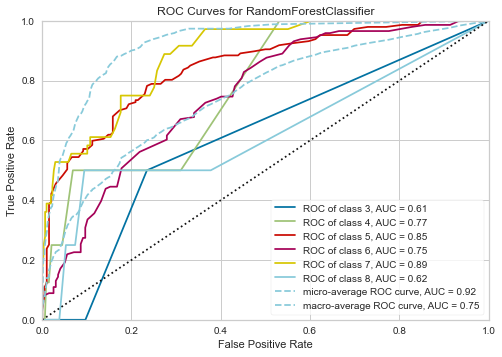

In [16]:
plot_model(estimator = rf, plot = 'auc')

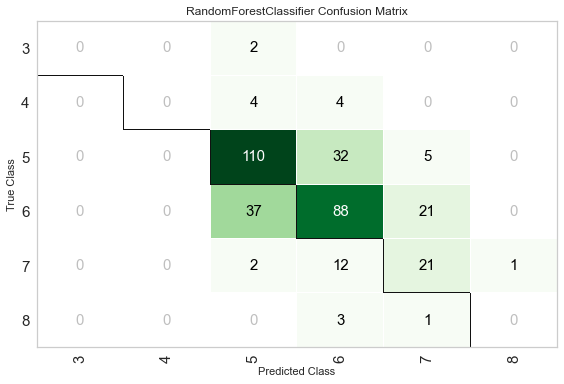

In [17]:
plot_model(estimator = rf, plot = 'confusion_matrix')

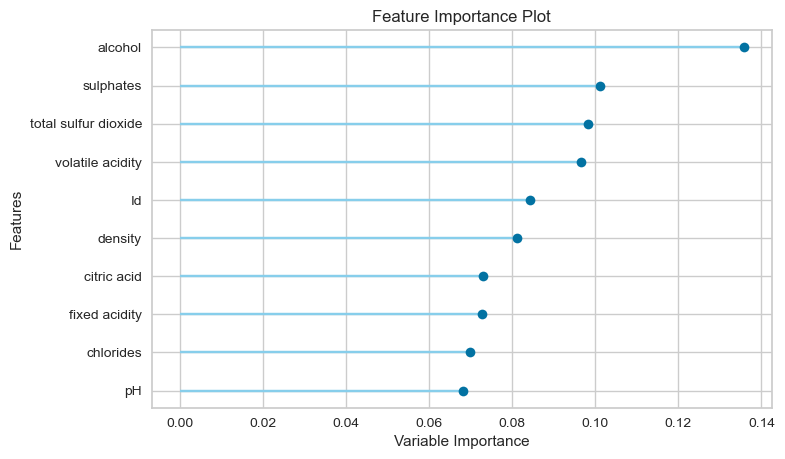

In [18]:
plot_model(estimator = rf, plot = 'feature')

In [19]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
pip install shap

     |████████████████████████████████| 433 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 7.0 MB/s eta 0:00:011
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


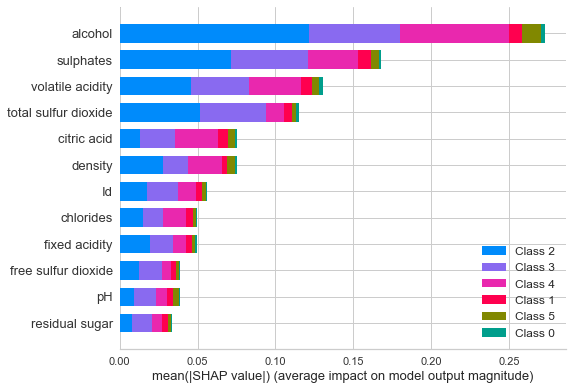

In [22]:
interpret_model(rf)

In [24]:
logr  = create_model('lr');          

blend = blend_models(estimator_list=[rf,logr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.3624,0.5766,0.5861,0.3521,0.3539
1,0.6375,0.0000,0.3649,0.6192,0.6173,0.4018,0.4074
2,0.6125,0.0000,0.3569,0.5789,0.5908,0.3739,0.3788
3,0.6375,0.0000,0.3959,0.6015,0.6096,0.4190,0.4305
4,0.6875,0.0000,0.4106,0.6618,0.6698,0.4969,0.5019
5,0.7250,0.0000,0.4170,0.6995,0.7014,0.5523,0.5599
6,0.6375,0.8333,0.2795,0.6051,0.5958,0.3966,0.4092
7,0.6125,0.7571,0.2814,0.5788,0.5878,0.3698,0.3752
8,0.6125,0.8087,0.2912,0.5998,0.5919,0.3656,0.3714
